Feature Extraction

Bag-of-Words

In [1]:
# Bag of words model  (BOW)
# represent all the bags in a matrix of size (number of bags, number of words in the vocabulary) 
# each row is a bag and each column is a word in the vocabulary
# the value in each cell is the number of times the word appears in the bag
# the vocabulary is the set of all the words in the corpus
# the corpus is the set of all the bags
# the number of bags is the number of documents in the corpus
# the number of words in the vocabulary is the number of unique words in the corpus


# TF-IDF model
# Word2Vec model


In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from preprocess import Preprocess 
preprocess = Preprocess()

Emojis:  True
Lemmatizor:  camel


In [3]:
# nltk.download('stopwords')


In [4]:
# read the data
t = pd.read_csv('./Dataset/train.csv')
X = t['text']

In [3]:
# do the preprocessing
X = X.apply(preprocess.do_all)

In [6]:
print(X[0])
print(X[1])

['بِيل', 'غيتس', 'تَلَقَّى', 'لَقاح', 'تَصْوِير', 'إِبْرَة', 'السيرنجه', 'دَواء', 'لابَس', 'بُولُو', 'صَيْفِيّ', 'عِزّ', 'شِتاء', 'قال', 'أَحَد', 'مَزِيَّة', 'عُمَر', 'ال', 'عام', 'مُؤَهَّل', 'حُصُول', 'لَقاح', 'عَنَى', 'ٱِحْتاج', 'لَقاح', 'عُمْر', 'أَصْغَر', '<NUM>', '<NUM>', '<NUM>', '<thinking_face>', '<LINK>', 'كوفيد', 'كوفيد']
['وَزِير', 'صِحَّة', 'لَحَد', 'يَوْم', 'تَحْدِيد', 'بمؤتمروا', 'صُحُفِيّ', 'مُشْكِلَة', 'مَعا', 'آن', 'بفايزر', 'لَقاح', 'وَحِيد', 'عالَم', 'حُبَيْبِيّ', 'هاي', 'أَفاق', 'واضِح', 'عَفْو', 'عَنَى', 'مَشّ', 'آن', 'مَجْبُور', 'قادِر', 'أَجْبَر', 'دَوْلَة', 'مارِق', 'دَفَع', 'مَصارِيّ', 'أَجاب', 'لَقاح', 'تَأَنِّي', 'يلا', '<LF>', '<LF>', '<LF>', '<LF>']


<BarContainer object of 6988 artists>

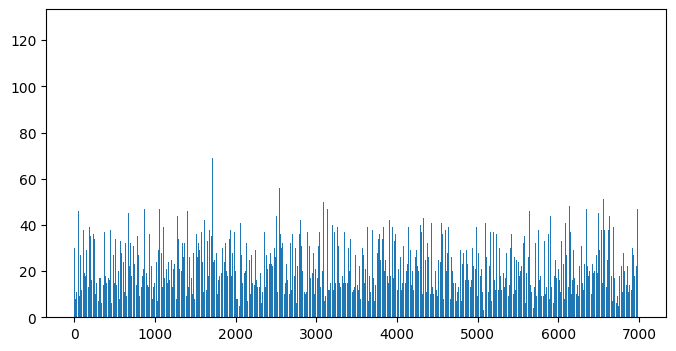

In [6]:
# view distribution (biased data)
import matplotlib.pyplot as plt

distribution = X.apply(len)
plt.figure(figsize=(8,4))
plt.bar(distribution.index, distribution.values)

In [4]:
# count vectorizer function takes sentences as input 
# convert it into matrix representation 
# where each cell will be filled by the frequency of each vocab
# vectorizer = CountVectorizer()
# bow_model = vectorizer.fit_transform(X)

In [8]:
# print(bow_model.toarray())

In [9]:
# transform the matrx into pandas dataframe 
# to set the column names as actual vocab words which are our features
# df_bow = pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())
# df_bow

In [10]:
#show all features (unique words)
# print(vectorizer.get_feature_names())


Word2Vec

In [11]:
# Word2vec is trained to predict the nearest word belongs to the context
# e.g. to tell if "milk" is a likely word given the "The cat was drinking..."
import gensim
from gensim.models import Word2Vec
import numpy as np

In [26]:
# Create CBOW (Continuous Bag of Words) model 
model_cbow = Word2Vec(X, min_count = 1, vector_size = 300, window = 5) 
# applied on the preprocessed data X
# print(model_cbow)
# words_cbow = list(model_cbow.wv.index_to_key)
print(words_cbow[:50])
# cosine similarity
print(model_cbow.wv.similarity('وَزِير', 'مَلِك'))
print(model_cbow.wv.similarity('وَزِير', 'أَمارَة'))
print(model_cbow.wv.similarity('وَزِير', 'مُواطِن'))
print(model_cbow.wv.similarity('وَزِير', 'رَئِيس'))
print(model_cbow.wv.similarity('مَلِك', 'رَئِيس'))

# most similar words
print(model_cbow.wv.most_similar('وَزِير'))
print(model_cbow.wv.most_similar('مَلِك'))
print(model_cbow.wv.most_similar('مُواطِن'))
print(model_cbow.wv.most_similar('رَئِيس'))
print(model_cbow.wv.most_similar('أَمارَة'))


# print the vector of a word
# print(model_cbow.wv.get_vector('مِن'))
# print(len(model_cbow.wv[model_cbow.wv.index_to_key]))

['<LF>', 'لَقاح', 'كَوَّر', '<LINK>', '<NUM>', 'جُرْعَة', 'صِحَّة', 'تَطْعِيم', 'تَلَقَّى', 'كوفيد', 'فَيْرُوس', 'اللَّه', 'يَوْم', 'فايزر', 'دَوْلَة', 'عاجِل', 'سَعُودِيّ', 'مِلْيُون', 'ضِدّ', '<Mt>', 'مَلِك', 'وِزارَة', 'ثانِي', 'وَزِير', 'أَراد', 'حَرَم', 'أَمارَة', 'خادِم', 'تَمّ', 'أَلْقَى', 'شَرِيف', 'عَرَبِيّ', 'مُواطِن', 'شَرِكَة', 'رَئِيس', 'مَمْلَكَة', 'عالَم', 'مُضادّ', 'أَمْرِيكِيّ', 'أَلْف', 'شَخْص', 'قال', 'شَعْب', 'شُكْر', '️', 'أُرْدُنّ', 'بَلَد', 'طِبِّيّ', 'سَبَب', 'أَعْلَن']
0.75276804
0.353998
0.692091
0.8022841
0.6153619
[('تَعْلِيم', 0.9447140097618103), ('صِحَّة', 0.9390547871589661), ('سعيدي', 0.9358798265457153), ('ٱِنْتِقالِيّ', 0.9188236594200134), ('رِياضَة', 0.9158366918563843), ('كورونا،بمشاركه', 0.9144365191459656), ('وِزارَة', 0.9093389511108398), ('سبق":', 0.9048829674720764), ('مَتَع', 0.9047804474830627), ('تُرْكِيّ', 0.9043036699295044)]
[('عَبْدُه', 0.9824407696723938), ('رِياض', 0.9721140265464783), ('<camera_with_flash>', 0.9695516228675842), ('فِ

In [ ]:
# create skip-gram model (SG) 
model_sg = Word2Vec(X, min_count = 1, vector_size = 300, window = 5, sg=2) 
# applied on the preprocessed data X
# print(model_sg)
# words_sg = list(model_sg.wv.index_to_key)
# print(words_sg[0:5])

# print the vector of a word
# print(model_sg.wv['مِن'])

# model_sg.wv['word']: has the vector of the word

In [ ]:
# don't apply mean for the LSTM/RNN models
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model.wv.index_to_key]
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return []

In [ ]:
# get the vector of the first sentence
get_mean_vector(model_cbow, X[0])

In [ ]:
get_mean_vector(model_sg, X[0])

In [ ]:
# append the vectors of all sentences to a list
vectors_cbow = []
vectors_sg = []
# get the vector of all sentences 
for sentence in X:
    vec = get_mean_vector(model_cbow, sentence)
    if len(vec) > 0:
        vectors_cbow.append(vec)

for sentence in X:
    vec = get_mean_vector(model_sg, sentence)
    if len(vec) > 0:
        vectors_sg.append(vec)
